<a href="https://colab.research.google.com/github/ganeshiimi/AV/blob/master/NLPProject_2_Topic_Modelling_Sports_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Topic Modelling on BBC Sports News Articles

The data is available [link](http://mlg.ucd.ie/files/datasets/bbcsport-fulltext.zip).

In [ ]:
# Import required libraries
# Read data
# Explore and pre-process text
# Topic Modeling

## Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from google.colab import files
pd.set_option("display.max_colwidth", 200)

## Read Data

In [ ]:
# open the file using open() function
file = open('/content/drive/My Drive/NLP/sports_articles/003.txt', mode='rt', encoding='utf-8')

# read content using .read() function
text = file.read()

# close the file using .close() function
file.close()

In [ ]:
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

---

In [ ]:
# read file names
file_names = os.listdir("/content/drive/My Drive/NLP/sports_articles")

In [ ]:
# print first 10 file names
file_names[:10]

['011.txt',
 '077.txt',
 '094.txt',
 '027.txt',
 '100.txt',
 '033.txt',
 '072.txt',
 '090.txt',
 '025.txt',
 '003.txt']

---
Let's read all the articles using a for loop.

In [ ]:
# empty list
articles = []

# read all articles
for f in file_names:
    # open the file
    file = open('/content/drive/My Drive/NLP/sports_articles/'+f, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    
    articles.append(text)

In [ ]:
len(articles)

471

<br>

## Explore and Pre-process the Text

Let's try to understand the text data we have in the BBC Sports News Articles. This exploration will determine the subsequent sequence of actions to be taken on the text data.

First of all, we will randomly select some articles and inspect them.

In [ ]:
articles[54]

'Jones medals \'must go if guilty\'\n\nWorld Anti-Doping Agency (WADA) chief Dick Pound says Marion Jones should be stripped of all her medals if found guilty of taking banned substances.\n\nVictor Conte, of Balco Laboratories, claims the American sprinter regularly used drugs to enhance her performance. "If she is found guilty she should be stripped of all her medals and banned for two years," said Pound. Asked if there was a timescale as to what medals could be taken, Pound said: "That is not an issue at all." However, under International Olympic Committee (IOC) rules, athletes can only be stripped of their medals if caught within three years of the event. Jones, who won five medals at the 2000 Olympics, denies using drugs and says she will take legal action over Conte\'s allegations. Balco Laboratories is the firm at the centre of a wide-reaching investigation into doping in the US. Pound continued: "If she has indeed taken drugs it is going to be a big disappointment for a lot of p

---

There are lots __(\\')__ and __(\n)__ which are undesirable. Let's go ahead and get rid of them.

### 1. Text Cleaning

In [ ]:
clean_articles = []

# clean the articles and store it in the list clean_articles
for i in articles:
    clean_articles.append(i.replace("\n"," ").replace("\'", " "))

In [ ]:
clean_articles[54]

'Jones medals  must go if guilty   World Anti-Doping Agency (WADA) chief Dick Pound says Marion Jones should be stripped of all her medals if found guilty of taking banned substances.  Victor Conte, of Balco Laboratories, claims the American sprinter regularly used drugs to enhance her performance. "If she is found guilty she should be stripped of all her medals and banned for two years," said Pound. Asked if there was a timescale as to what medals could be taken, Pound said: "That is not an issue at all." However, under International Olympic Committee (IOC) rules, athletes can only be stripped of their medals if caught within three years of the event. Jones, who won five medals at the 2000 Olympics, denies using drugs and says she will take legal action over Conte s allegations. Balco Laboratories is the firm at the centre of a wide-reaching investigation into doping in the US. Pound continued: "If she has indeed taken drugs it is going to be a big disappointment for a lot of people."

---

Let's remove numbers, punctuation, and special characters (&!>$@$...etc).

In [ ]:
# strip everthing except alphabets from the text
clean_articles = [re.sub("[^a-zA-Z]"," ",x) for x in clean_articles]

In [ ]:
clean_articles[54]

'Jones medals  must go if guilty   World Anti Doping Agency  WADA  chief Dick Pound says Marion Jones should be stripped of all her medals if found guilty of taking banned substances   Victor Conte  of Balco Laboratories  claims the American sprinter regularly used drugs to enhance her performance   If she is found guilty she should be stripped of all her medals and banned for two years   said Pound  Asked if there was a timescale as to what medals could be taken  Pound said   That is not an issue at all   However  under International Olympic Committee  IOC  rules  athletes can only be stripped of their medals if caught within three years of the event  Jones  who won five medals at the      Olympics  denies using drugs and says she will take legal action over Conte s allegations  Balco Laboratories is the firm at the centre of a wide reaching investigation into doping in the US  Pound continued   If she has indeed taken drugs it is going to be a big disappointment for a lot of people  

In [ ]:
# remove single character terms
clean_articles = [' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles]

In [ ]:
clean_articles[54]

'Jones medals must go if guilty World Anti Doping Agency WADA chief Dick Pound says Marion Jones should be stripped of all her medals if found guilty of taking banned substances Victor Conte of Balco Laboratories claims the American sprinter regularly used drugs to enhance her performance If she is found guilty she should be stripped of all her medals and banned for two years said Pound Asked if there was timescale as to what medals could be taken Pound said That is not an issue at all However under International Olympic Committee IOC rules athletes can only be stripped of their medals if caught within three years of the event Jones who won five medals at the Olympics denies using drugs and says she will take legal action over Conte allegations Balco Laboratories is the firm at the centre of wide reaching investigation into doping in the US Pound continued If she has indeed taken drugs it is going to be big disappointment for lot of people'

---
We have cleaned our text to a great extent. However, we should now make uppercase characters to lowercase or else it would result in an inflated vocabulary of unique words.

For example, the terms __'But'__ and __'but'__ would be considered as 2 separate words.

In [ ]:
clean_articles = [x.lower() for x in clean_articles]

In [ ]:
clean_articles[54]

'jones medals must go if guilty world anti doping agency wada chief dick pound says marion jones should be stripped of all her medals if found guilty of taking banned substances victor conte of balco laboratories claims the american sprinter regularly used drugs to enhance her performance if she is found guilty she should be stripped of all her medals and banned for two years said pound asked if there was timescale as to what medals could be taken pound said that is not an issue at all however under international olympic committee ioc rules athletes can only be stripped of their medals if caught within three years of the event jones who won five medals at the olympics denies using drugs and says she will take legal action over conte allegations balco laboratories is the firm at the centre of wide reaching investigation into doping in the us pound continued if she has indeed taken drugs it is going to be big disappointment for lot of people'

---
Now we will check the most frequent words appearing in the articles.

In [ ]:
# function to plot top 30 most frequent words
def freq_words(x, terms = 30):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  all_words = text.split()
  
  # prepare a dictionary of word-frequency pairs
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  
  # plot the word counts  
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

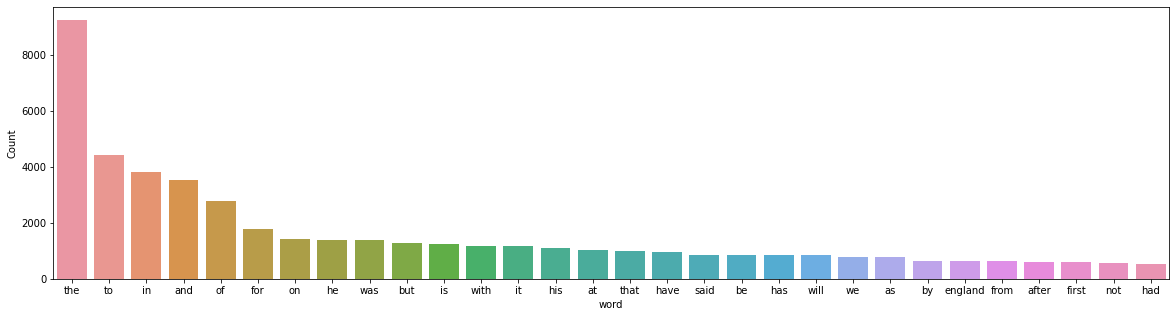

In [ ]:
freq_words(clean_articles)

Words like 'the', 'and', 'for', 'on' etc. are in large numbers and they don't really tell us anything about any topic or idea. Hence, we should take off these sort of words and let the more important words come up.

### 2. Lemmatize Text and Strip Stopwords

In [ ]:
# load spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# lemmatization
clean_articles = [' '.join([token.lemma_ for token in nlp(x)]) for x in clean_articles]

# remove stopwords
clean_articles = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_articles]

In [ ]:
clean_articles[54]

'jones medal guilty world anti dope agency wada chief dick pound marion jones strip -PRON- medal find guilty ban substance victor conte balco laboratory claim american sprinter regularly use drug enhance -PRON- performance -PRON- find guilty -PRON- strip -PRON- medal ban year pound ask timescale medal pound issue international olympic committee ioc rule athlete strip -PRON- medal catch year event jones win medal olympics deny use drug -PRON- legal action conte allegation balco laboratory firm centre wide reach investigation dope pound continue -PRON- drug -PRON- big disappointment lot people'

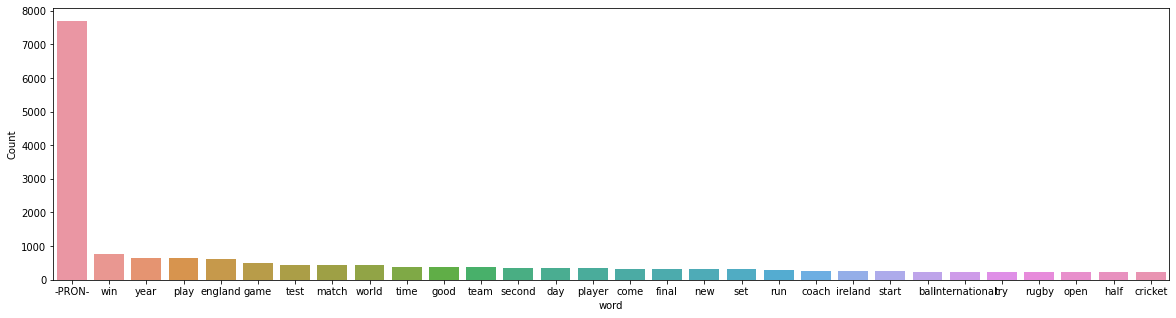

In [ ]:
freq_words(clean_articles)

Most of the stopwords have been removed. However, quite a many pronouns have been replaced with the tag __-PRON-__. This is a technical issue with spaCy. We will have to manually remove it.

In [ ]:
# remove -PRON- tags
clean_articles = [re.sub('-PRON-',  '', i) for i in clean_articles]

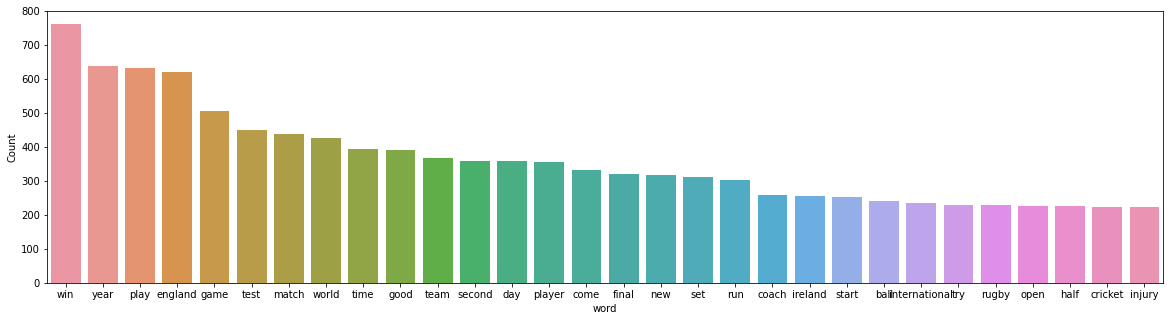

In [ ]:
freq_words(clean_articles)

<br>

## Topic Modeling

__Document-Term-Matrix__

<img src="table.png">

In [ ]:
def get_words(x):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  return set(text.split())

In [ ]:
# get unique words in the articles
unique_words = get_words(clean_articles)

# count of unique words
len(unique_words)

7754

This is the first step towards topic modeling. We will use sklearn's TfidfVectorizer to create a document-term matrix with 1000 terms.

__1. Vectorization__

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
    
X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 7754)

In [ ]:
X_df=pd.DataFrame(csr_matrix(X).toarray(),columns=vectorizer.get_feature_names(),index=range(len(clean_articles)))
#X_df = pd.SparseDataFrame(X, columns=vectorizer.get_feature_names(), index=range(len(clean_articles)), default_fill_value=0)

In [ ]:
X_df.iloc[:10,1000:1020]

,cancellation,cancer,candidate,candidly,canterbury,cap,capability,capable,capacity,cape,capital,capitalise,capitulate,capitulation,capriati,capt,captain,captaincy,captivate,capture
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.064185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.055712,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 most important terms 
                             min_df= 5,
                             max_df = 0.9)
    
X = vectorizer.fit_transform(clean_articles)

X.shape # check shape of the document-term matrix

(471, 1000)

__2. Dimensionality Reduction__

The next step is to represent each and every term and document as a vector.  
* Specify the number of topics.
* Decompose the document-term matrix into 2 matrix.
    1. Document-Topic Matrix
    2. Topic-Term Matrix
  
  ![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_7.png)
  
* Use sklearn's TruncatedSVD to perform the task of matrix decomposition. 

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter=100)

In [ ]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=12, tol=0.0)

The components of svd_model are our topics and we can access them using svdmodel.components. Finally let's print a few most important words in each of the 4 topics and see how good our model is.

In [ ]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'test', 'match', 'world', 'good', 'team', 'player', 'ireland', 'final', 'time', 'day', 'new', 'cricket', 'rugby', 'second', 'come', 'france', 'open', 'coach', 'set', 'wales', 'run', 'cup', 'injury', 'think', 'tour', 'half', 'south', 'australia', 'start', 'series', 'international', 'nation', 'victory', 'beat', 'try', 'week', 'captain', 'champion', 'great', 'season', 'williams', 'ball', 'robinson', 'lose', 've']


Topic 1: 
['champion', 'win', 'indoor', 'seed', 'title', 'open', 'world', 'olympic', 'race', 'final', 'set', 'year', 'european', 'holmes', 'roddick', 'federer', 'event', 'round', 'woman', 'compete', 'beat', 'hewitt', 'record', 'britain', 'birmingham', 'break', 'grand', 'australian', 'championship', 'gold', 'american', 'athens', 'british', 'athlete', 'agassi', 'jump', 'medal', 'second', 'davenport', 'double', 'tennis', 'madrid', 'henman', 'safin', 'wimbledon', 'francis', 'old', 'marathon', 'cross', 'slam']


Topic 2: 
['englan

## Article Categorization

In [ ]:
lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(471, 4)

In [ ]:
lsa_topic_matrix[41]

array([ 0.2770687 ,  0.12303793, -0.09832932,  0.15078977])

In [ ]:
articles[9]

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

In [ ]:
np.argmax(lsa_topic_matrix[9])

0

In [ ]:
articles[10]

"Balco case trial date pushed back\n\nThe trial date for the Bay Area Laboratory Cooperative (Balco) steroid distribution case has been postponed.\n\nUS judge Susan Illston pushed back a preliminary evidentiary hearing - which was due to take place on Wednesday - until 6 June. No official trial date has been set but it is expected to begin in September. Balco founder Victor Conte along with James Valente, coach Remy Korchemny and trainer Greg Anderson are charged with distributing steroids to athletes.\n\nAnderson's clients include Barry Bonds, and several other baseball stars have been asked to appear before a congressional inquiry into steroid use in the major leagues. The Balco defence team have already lost their appeal to have the case dismissed at a pre-trial hearing in San Francisco but will still argue the case should not go to trial. The hearing in June will focus on the admissibility of evidence gathered during police raids on Balco's offices and Anderson's home. Conte and An

In [ ]:
np.argmax(lsa_topic_matrix[10])

3

## Challenge

Use Latent Dirichlet Allocation (LDA) to build a topic model on the same dataset and compare its results with the above topics.

In [ ]:
## Topic Modelling 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def generate_topic_models(text):
    cvectorizer = CountVectorizer(min_df=5, max_features=2000)
    cvz = cvectorizer.fit_transform(text)
    #replaceing count vectorizer with tfidf vectorizer
    #cvectorizer = TfidfVectorizer(max_features= 2000,min_df= 5)
    #cvz = cvectorizer.fit_transform(text)
    
    lda_model = LatentDirichletAllocation(n_components=4, learning_method='online', max_iter=100, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    topic_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
   
    return topic_word, vocab ,X_topics

n_top_words = 20
topic_word, vocab ,X_topics= generate_topic_models(pd.DataFrame(clean_articles,columns=['Clean_data'])["Clean_data"].values)

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")


Topic 1: win | set | game | second | final | break | seed | match | roddick | play | beat | ireland | half | try | point | france | open | victory | williams | nadal

Topic 2: play | year | england | win | player | game | team | cup | coach | rugby | good | match | world | think | time | new | come | injury | nation | great

Topic 3: test | cricket | day | ball | series | wicket | england | run | play | pakistan | india | south | australia | match | africa | catch | vaughan | team | tour | batsman

Topic 4: year | world | win | olympic | champion | race | indoor | time | test | second | good | athens | european | run | athlete | henman | british | final | record | set



In [ ]:
#def rowIndex(row):
#    return row.name
Final_data=pd.DataFrame(list(zip(articles,clean_articles)),columns=['article','Clean_data'])
Final_data['lsa_output']=Final_data.apply(lambda x:np.argmax(lsa_topic_matrix[rowIndex(x)]),axis=1)
Final_data['lda_output']=Final_data.apply(lambda x:np.argmax(X_topics[rowIndex(x)]),axis=1)
#Final_data.head()

In [ ]:
#0=cricket,1=tennis, 2=rugby,3=olympic
#1=tennis,2=cricket, 3=rugby,4=olympic
#Final_data=Final_data.replace(to_replace={"lsa_output": {0:"cricket",1:"tennis", 2:"rugby",3:"olympic"}, 'lda_output': {1:"tennis",2:"olympic", 3:"rugby",4:"cricket"}})
Final_data.head(15)
pd.crosstab(Final_data["lsa_output"],Final_data["lda_output"],margins=True)


lda_output,0,1,2,3,All
lsa_output,,,,,
0,89,166,101,69,425
1,1,0,0,17,18
2,2,0,0,0,2
3,0,0,0,26,26
All,92,166,101,112,471


In [ ]:
Final_data.to_csv(r'NLPProject2Submission.csv')
files.download('NLPProject2Submission.csv')